# Final Project w207: Radhika, Tres, Hil, Ricollis

In [100]:
# General libraries.
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

### Reading car CSV data

In [101]:
df = pd.read_csv('vehicles.csv',engine='python', error_bad_lines=False)

### EDA: basic exploration/ changing data types/dropping unnecessary columns

In [102]:
#randomly sample data 
df.sample(8)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
252045,7306440289,https://cnj.craigslist.org/ctd/d/farmingdale-2...,central NJ,https://cnj.craigslist.org,21495,2018.0,chrysler,300,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00D0D_k0WKvGn9Z0...,2018 Chrysler 300 CALL Automotive Avenues: (73...,NaN,nj,40.204300,-74.177900,2021-04-13T19:16:21-0400
420010,7315107178,https://madison.craigslist.org/ctd/d/eau-clair...,madison,https://madison.craigslist.org,29950,2012.0,porsche,cayenne turbo awd,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00N0N_dXj8gZMA1G...,2012 Porsche Cayenne Turbo AWD ✔ We TAKE TRAD...,NaN,wi,44.834600,-91.515900,2021-04-30T19:04:57-0500
284070,7314492417,https://nh.craigslist.org/cto/d/manchester-bui...,new hampshire,https://nh.craigslist.org,2300,2003.0,buick,rendezvous,good,6 cylinders,...,full-size,SUV,custom,https://images.craigslist.org/00Y0Y_a9yZhZ3E0s...,Family suv start right up run and drive it ver...,NaN,nh,42.965600,-71.449300,2021-04-29T16:06:48-0400
369904,7316095184,https://dallas.craigslist.org/ftw/ctd/d/fort-w...,dallas / fort worth,https://dallas.craigslist.org,12996,2016.0,chevrolet,cruze limited,NaN,4 cylinders,...,compact,sedan,grey,https://images.craigslist.org/01515_IIdkkpkmnn...,Most common questions about this vehicle: Wan...,NaN,tx,32.975361,-97.310486,2021-05-03T03:14:15-0500
133404,7312402346,https://boise.craigslist.org/ctd/d/ontario-201...,boise,https://boise.craigslist.org,39694,2015.0,toyota,tundra,NaN,8 cylinders,...,NaN,truck,silver,https://images.craigslist.org/00O0O_939YnqNvlL...,"2015 Toyota Tundra LTD -- $39,694 ☎ Call...",NaN,id,44.024289,-116.991239,2021-04-25T11:30:21-0600
238357,7304158757,https://greensboro.craigslist.org/ctd/d/greens...,greensboro,https://greensboro.craigslist.org,24590,2018.0,bmw,3 series 330i xdrive sedan,good,NaN,...,NaN,sedan,black,https://images.craigslist.org/01212_ksMbsNE6b2...,Carvana is the safer way to buy a car During t...,NaN,nc,36.070000,-79.820000,2021-04-09T11:11:26-0400
390244,7304310541,https://danville.craigslist.org/ctd/d/lynchbur...,danville,https://danville.craigslist.org,0,2018.0,nissan,altima,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00r0r_f0fSPwLHiJ...,Terry Clearance Center You'll Love Our Cars! C...,NaN,va,37.379740,-79.247070,2021-04-09T15:04:21-0400
110246,7307669867,https://sarasota.craigslist.org/ctd/d/sarasota...,sarasota-bradenton,https://sarasota.craigslist.org,13688,2012.0,honda,odyssey,NaN,NaN,...,NaN,mini-van,NaN,https://images.craigslist.org/00t0t_3h3aUiwKgS...,2012 Honda ODYSSEY EX-L LEATHER CAMERA FL MINI...,NaN,fl,27.269770,-82.482290,2021-04-16T10:04:21-0400


In [103]:
# statistic information 
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [104]:
print("The maximum and minimum car prices")
print(df['price'].max())
print(df['price'].min())

The maximum and minimum car prices
3736928711
0


In [105]:
# show columns
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [106]:
# Sanity checking data types
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [107]:
df.shape

(426880, 26)

In [108]:
df['year'] = df.year.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          426880 non-null  object 
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [109]:
#Dropping possibly unnecessary columns for our analysis

drop_cols =['url','image_url','region_url', 'size', 'VIN','county','id','description','lat','long']
df.drop(columns=drop_cols , axis=1, inplace=True)

df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

df.shape

(115988, 16)

<AxesSubplot:>

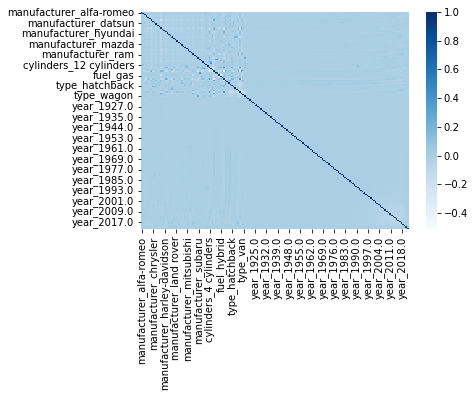

In [110]:
category = ['manufacturer','cylinders','fuel','drive','type','year']

category_full_list = ['manufacturer','cylinders','fuel','drive','type','paint_color','condition','year','posting_date'
           ,'state','model', 'region', 'transmission', 'title_status']

numerical = df.drop(category_full_list, axis=1)

categorical = df[category]

df2 = pd.get_dummies(categorical, drop_first = True, sparse = True)
df2.head()

df3 = pd.concat([df2, numerical], axis = 1)
df2.corr()
sns.heatmap(df2.corr(), cmap = 'Blues')

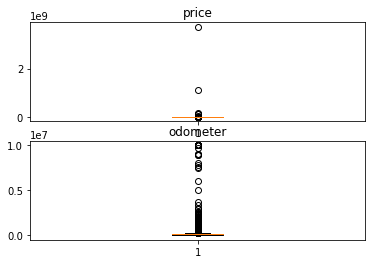

In [118]:
#outlier detection in numerical

count = 1
for num in numerical:
    ax = plt.subplot(2, 1, count)
    ax.set_title(num)
    ax.boxplot(data = numerical, x=num)
    count += 1
    
plt.show()

#### We have a lot of data (>115k). We will work with a smaller sample size to help the processing go faster. In future iterations of model building, we can spend more time curating the data and running models with larger sample sizes.

In [119]:
df4 = df3.sample(3000)

#### We split the data into training, development and testing data.

In [121]:
from sklearn.model_selection import train_test_split
import numpy as np
X = df4.loc[:, df4.columns != 'price']
Y = df4['price']
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.20, random_state=42)
dev_data,test_data, dev_labels,test_labels = train_test_split(test_data, test_labels, test_size=0.50, random_state=42)

In [122]:
df4.shape

(3000, 168)

### Model building

#### The goal of this project is to predict the price of second-hand vehicles sold on Craigslist. This dataset requires a linear regression type model to be run as the outcome variable is continous. We will evaluate our model's efficacy based on its R2 coefficient which explains the model's fit to the data.

First we start with a basic Linear Regression.

In [123]:
from sklearn.linear_model import LinearRegression
linmod = LinearRegression()
linmod.fit(train_data, train_labels)
print(linmod.score(dev_data, dev_labels))

0.2936957170865713


/Applications/anaconda3/envs/home/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Applications/anaconda3/envs/home/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


We then experimented with another type of regressor (SGD – stochastic gradient descent) but did not see good performance. This is probably not the way to go.

In [124]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=500,early_stopping=True,learning_rate='adaptive')
model.fit(train_data, train_labels)
model.score(dev_data,dev_labels)

/Applications/anaconda3/envs/home/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Applications/anaconda3/envs/home/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


-1.7435598446813363e+23

The next regressor we use is the Random Forest Regressor. Performance is a little better here, probably because we are using an ensemble model which takes the average of multiple estimators before making a final decision.

In [125]:
from sklearn.ensemble import RandomForestRegressor

# define used regressor
forest=RandomForestRegressor(n_estimators=20,
                             max_depth=10,
                             criterion='mse',
                            )

# train model
forest.fit(train_data,train_labels)
forest.score(dev_data,dev_labels)

/Applications/anaconda3/envs/home/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Applications/anaconda3/envs/home/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.39042809962268876

### Evaluate results and Future Work

So far our R2 scores are quite low. For the problem we are trying to solve, we are satisfied with the model types we are using (Linear Regression/Random Forest) but think more preprocessing may be necessary to fully capture the trends present in the data.
We plan to look more closely at dummy variables (OneHotEncoding) for categorical variables, figure out how to work in features with really diverse answers, and maybe do some kind of text processing to account for that. An example of a feature that would fit this description is the model of the car. There are over 11000 different car models in the dataset which does not make sense and needs some text cleaning to bring it down to a more reasonable number.
Once this preprocessing is accomplished, we expect to see higher R2 score and better confidence in our model's ability to predict prices of resold cars.